In [1]:
import numpy as np
import math
import time
import pandas as pd
import os
from scipy.stats import norm
from copy import deepcopy
from functools import partial
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

In [3]:
nsimu=100; p=10; K=11; K0_pval = 0.9 # simu1-pKsmall
# nsimu=100; p=50; K=21; K0_pval = 0.9 # simu1-pKmedium
# nsimu=100; p=500; K=51; K0_pval = 0.9 # simu1-pKlarge

In [4]:
mnt_path = '/mnt/multi-class_simu/simulation/result/simu1/'

data = np.load(mnt_path+f'N1_K{K}_p{p}_K0_pval[{K0_pval}].npz')
beta_pmle_1 = data['beta_pmle']; beta_nr_1 = data['beta_nr']; beta_gd_1 = data['beta_gd']; 
beta_true_1 = np.ones([nsimu,p+1,K-1])*data['beta_true']
t_nr = data['t_nr']; t_gd = data['t_gd']; t_pmle = data['t_pmle']; num_pos_idxs = data['num_pos_idxs']

print(f't_nr={np.round(np.mean(t_nr),3)}s, t_gd={np.round(np.mean(t_gd),3)}s, t_pmle={np.round(np.mean(t_pmle),3)}s')
print(f'N_k_mean={np.round(np.mean(np.mean(num_pos_idxs,0)[1:]),2)}')
print(f'N0={np.round(np.mean(num_pos_idxs,0)[0])}')

rmse_pmle = np.sqrt(np.mean(np.mean((beta_true_1-beta_pmle_1)**2,2),1))
rmse_nr = np.sqrt(np.mean(np.mean((beta_true_1-beta_nr_1)**2,2),1))
rmse_gd = np.sqrt(np.mean(np.mean((beta_true_1-beta_gd_1)**2,2),1))
rmse_1 = np.concatenate((rmse_nr.reshape([nsimu,1]),rmse_gd.reshape([nsimu,1]),rmse_pmle.reshape([nsimu,1])),0)

####
data = np.load(mnt_path+f'N2_K{K}_p{p}_K0_pval[{K0_pval}].npz')
beta_pmle_2 = data['beta_pmle']; beta_nr_2 = data['beta_nr']; beta_gd_2 = data['beta_gd']; 
beta_true_2 = np.ones([nsimu,p+1,K-1])*data['beta_true']
t_nr = data['t_nr']; t_gd = data['t_gd']; t_pmle = data['t_pmle']; num_pos_idxs = data['num_pos_idxs']

print(f't_nr={np.round(np.mean(t_nr),3)}s, t_gd={np.round(np.mean(t_gd),3)}s, t_pmle={np.round(np.mean(t_pmle),3)}s')
print(f'N_k_mean={np.round(np.mean(np.mean(num_pos_idxs,0)[1:]),2)}')
print(f'N0={np.round(np.mean(num_pos_idxs,0)[0])}')

rmse_pmle = np.sqrt(np.mean(np.mean((beta_true_2-beta_pmle_2)**2,2),1))
rmse_nr = np.sqrt(np.mean(np.mean((beta_true_2-beta_nr_2)**2,2),1))
rmse_gd = np.sqrt(np.mean(np.mean((beta_true_2-beta_gd_2)**2,2),1))
rmse_2 = np.concatenate((rmse_nr.reshape([nsimu,1]),rmse_gd.reshape([nsimu,1]),rmse_pmle.reshape([nsimu,1])),0)

####
data = np.load(mnt_path+f'N5_K{K}_p{p}_K0_pval[{K0_pval}].npz')
beta_pmle_3 = data['beta_pmle']; beta_nr_3 = data['beta_nr']; beta_gd_3 = data['beta_gd']; 
beta_true_3 = np.ones([nsimu,p+1,K-1])*data['beta_true']
t_nr = data['t_nr']; t_gd = data['t_gd']; t_pmle = data['t_pmle']; num_pos_idxs = data['num_pos_idxs']

print(f't_nr={np.round(np.mean(t_nr),3)}s, t_gd={np.round(np.mean(t_gd),3)}s, t_pmle={np.round(np.mean(t_pmle),3)}s')
print(f'N_k_mean={np.round(np.mean(np.mean(num_pos_idxs,0)[1:]),2)}')
print(f'N0={np.round(np.mean(num_pos_idxs,0)[0])}')

rmse_pmle = np.sqrt(np.mean(np.mean((beta_true_3-beta_pmle_3)**2,2),1))
rmse_nr = np.sqrt(np.mean(np.mean((beta_true_3-beta_nr_3)**2,2),1))
rmse_gd = np.sqrt(np.mean(np.mean((beta_true_3-beta_gd_3)**2,2),1))
rmse_3 = np.concatenate((rmse_nr.reshape([nsimu,1]),rmse_gd.reshape([nsimu,1]),rmse_pmle.reshape([nsimu,1])),0)

rmse = np.concatenate((rmse_1,rmse_2,rmse_3), 0)

t_nr=1.227s, t_gd=6.883s, t_pmle=0.246s
N_k_mean=506.67
N0=94933.0
t_nr=2.584s, t_gd=7.536s, t_pmle=0.351s
N_k_mean=729.5
N0=192705.0
t_nr=7.239s, t_gd=39.948s, t_pmle=0.774s
N_k_mean=1172.07
N0=488279.0


In [5]:
n_estis = 3
n_Ns = 3

N =[1]*n_estis*nsimu
N.extend([2]*n_estis*nsimu)  
N.extend([3]*n_estis*nsimu)

cls = ['GMLE (NR)']*nsimu
cls.extend(['GMLE (GD)']*nsimu) 
cls.extend(['PMLE']*nsimu) 
cls = cls*n_Ns

data = pd.DataFrame((N,rmse,cls)).T
data.columns = ['N','RMSE','Estimators']
data = data.astype({'N':'category', 'RMSE':'float32','Estimators':'category'}) 

data.iloc[:,1] = np.log(data.iloc[:,1])

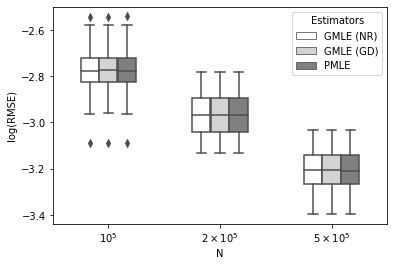

In [7]:
my_pal = {'GMLE (NR)': 'white','GMLE (GD)': 'lightgray', 'PMLE': 'gray'} 
sns.boxplot(data=data, x='N', hue='Estimators', y='RMSE',
                saturation=0.3, width=0.5, 
                palette=my_pal,
           hue_order=['GMLE (NR)','GMLE (GD)','PMLE']) 
plt.xticks(ticks= [0,1,2],labels = [r'$10^5$',r'$2\times 10^5$',r'$5\times 10^5$'],)
plt.ylabel('log(RMSE)')
# plt.savefig(mnt_path+'RMSE_box_small.png', dpi=600, bbox_inches='tight')
plt.show()

In [32]:
'''
simu2 SPMLE Visualization
'''
N = 1*10**5; K=21; p=50; K0_pval=0.9; pi_record=-0.1
data = np.load(f'/mnt/multi-class_simu/simulation/result/simu2/SPMLE_N{int(N/10**5)}_K{K}_p{p}_K0_pval[0.9]_pi{pi_record}.npz')
beta_pmle = data['beta_pmle']; beta_sub = data['beta_sub']; beta_true = data['beta_true'];
num_pos_idxs=data['num_pos_idxs']; num_pos_idxs_sub=data['num_pos_idxs_sub']
bias = -0.1*np.log(N)
beta_sub[:,0,:] = beta_sub[:,0,:]+bias
rmse_pmle = np.mean(np.sqrt(np.mean(np.mean((beta_pmle-beta_true)**2,2),1)))
rmse_sub = np.mean(np.sqrt(np.mean(np.mean((beta_sub-beta_true)**2,2),1)))

print(np.round(rmse_pmle,3),np.round(rmse_sub,3))
print(np.round(np.mean(num_pos_idxs[:,0]),2), np.round(np.mean(num_pos_idxs[:,1:]),2),np.round(np.mean(num_pos_idxs_sub),2))

0.039 0.039
477607.47 1119.63 128540.79
